In [2]:
#Q1 a) Derivative of x^4
#Importing sympy
 
from sympy import *
 
# create a "symbol" called x
x = Symbol('x')
 
#Define function
f = x**4

#Calculaing Derivative
dfdx = f.diff(x)
dfdx
dfdx = lambdify(x, dfdx) # convert to a function





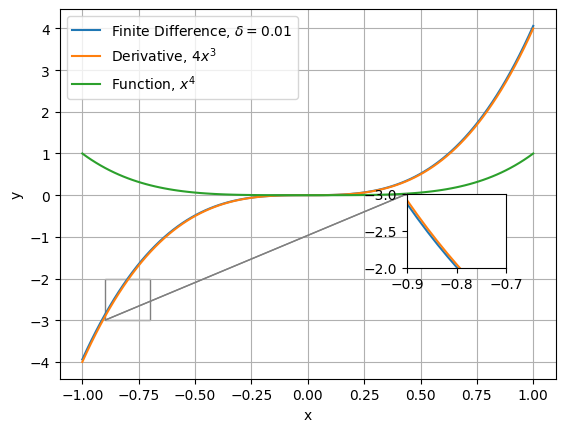

In [3]:
#Q1 b) For a range of values of x calculate the derivative value using the expression from part a) and the derivative function from sympy
f1 = lambdify(x, f)
import numpy as np
x_range = np.linspace(-1,1,100)

y = dfdx(x_range)

y_2 = f1(x_range)


#Also calculate the derivative value estimated using a finite difference with
#perturbation δ = 0.01 on x.

delta = 0.01
#finite difference
def finite_difference(f, x, delta):
    return (f(x+delta) - f(x))/delta

y_1 = finite_difference(f1, x_range, delta)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x_range,y_1, label = r'Finite Difference, $\delta = 0.01$')
ax.plot(x_range,y, label = r'Derivative, $4x^3$')
ax.plot(x_range,y_2, label = r'Function, $x^4$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

# Zoom in to a specific region of the plot

axins = ax.inset_axes([0.7, 0.3, 0.2, 0.2])
axins.plot(x_range, y_1, label='Finite Difference')
axins.plot(x_range, y, label='Derivative')
axins.set_xlim(-.9, -.7)  # set the x-axis limits
axins.set_ylim(-2, -3)  # set the y-axis limits
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=2, fc="none", ec="0.5")

plt.show()





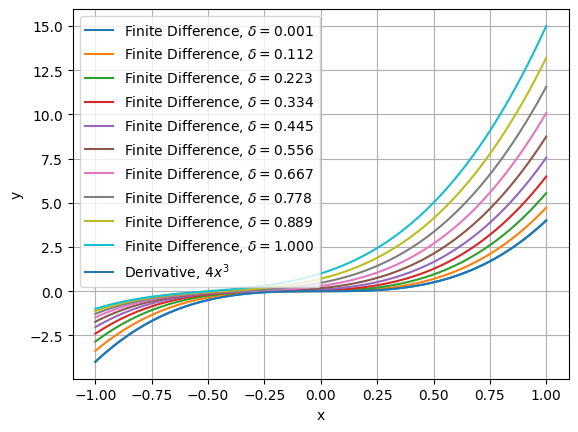

In [32]:

delta_range = np.linspace(0.001,1,10)

for i in range(len(delta_range)):
    y_1 = finite_difference(f1, x_range, delta_range[i])
    plt.plot(x_range,y_1, label = r'Finite Difference, $\delta = {:.3f}$'.format(delta_range[i]))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.plot(x_range,y, label = r'Derivative, $4x^3$')
plt.legend()
plt.grid(True)
plt.show()


# Use a single plot
# here so that the effect of changing δ is easier to compare. How does changing δ
# affect the accuracy of the estimated derivative? Why? 

# the smaller the value of delta the more accurate the approximation is. this is because a true derivative is the limit of the difference quotient as delta approaches 0.
#computers use different methods for calculating the derivative, and the finite difference method is one of them. the finite difference method is an approximation of the derivative. 
#that the true deriviative is just the smallest number a computer can use as delta

In [49]:
# (b) (i) Write a short python programme that implements gradient descent with a fixed
# step size α. Explain your code.

class QuadraticFn():
    def f(self, x):
        return x**4 # function value f(x)
    def df(self, x):
        return 4*x**3 # derivative of f(x)

def gradDescent(fn,x0,alpha,num_iters):
    x=x0; # initial value
    X=np.array([x]); 
    F=np.array(fn.f(x));
    for k in range(num_iters):
        step = alpha*fn.df(x) 
        x = x - step
        X=np.append(X,[x],axis=0); # x
        F=np.append(F,fn.f(x)) # f(x)
    return (X,F)

fn = QuadraticFn()
(X, F) = gradDescent(fn,x0=1,alpha=0.1, num_iters=50)


In [1]:

alpha = 0.1
x0 = 1
(X, F) = gradDescent(fn,x0,alpha, num_iters=50)

fig = plt.figure(figsize=(15, 5))
#plot X
plt.subplot(1,3,1)
plt.plot(X)
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('x0 = {:.2f}, alpha = {:.2f}'.format(x0,alpha))

#plot F
plt.subplot(1,3,2)
plt.plot(F)
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('x0 = {:.2f}, alpha = {:.2f}'.format(x0,alpha))

# plot the function
plt.subplot(1, 3, 3)
x_range = np.linspace(-1,1,100)
y = fn.f(x_range)
plt.plot(x_range,y, label = r'Function, $x^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()






NameError: name 'gradDescent' is not defined

In [35]:
# Plot how x and y(x) vary with each
# gradient descent iteration. Discuss.

# you have a cost function, and you want to find the minimum of that function. you have to pick a starting point, then the method is to take the derivative of the function and evaluate it at the starting point ,
#  and then move in the direction of the negative gradient. this is because the gradient is the direction of steepest ascent,
#  so if you move in the opposite direction you will move towards the minimum.
#  you then repeat this process until you reach the minimum.
# the learning rate is the step size, and it is the amount you move in the direction of the negative gradient.

4


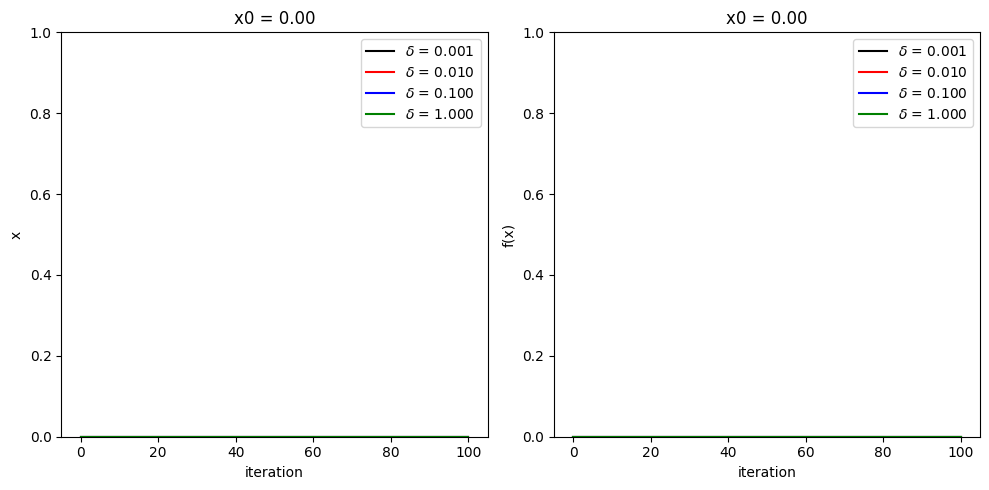

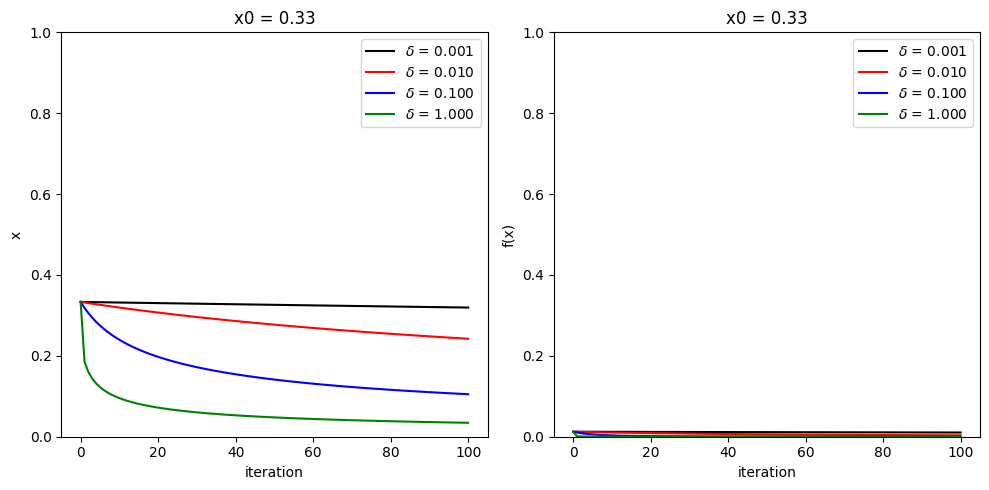

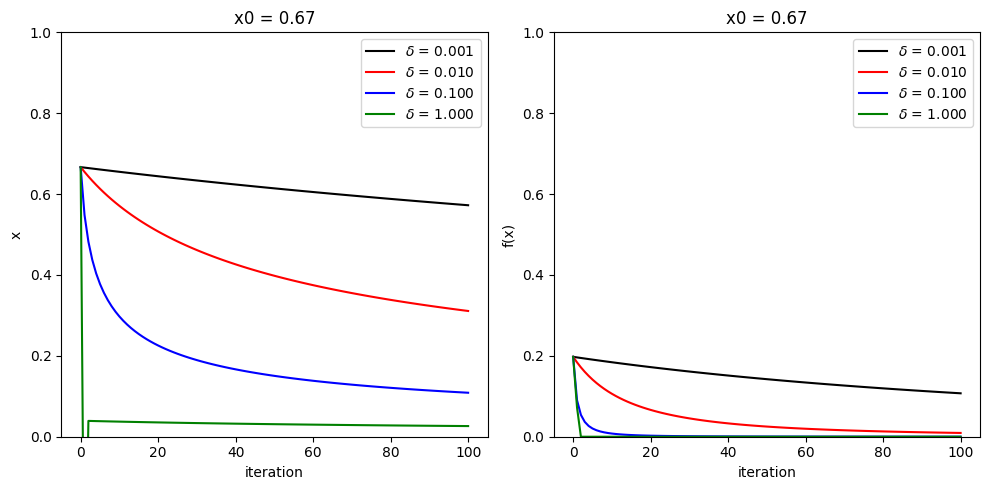

C:\Users\dan\AppData\Local\Temp\ipykernel_4076\2812550586.py:6: RuntimeWarning: overflow encountered in double_scalars
  return x**4 # function value f(x)
C:\Users\dan\AppData\Local\Temp\ipykernel_4076\2812550586.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 4*x**3 # derivative of f(x)
C:\Users\dan\AppData\Local\Temp\ipykernel_4076\2812550586.py:16: RuntimeWarning: invalid value encountered in double_scalars
  x = x - step


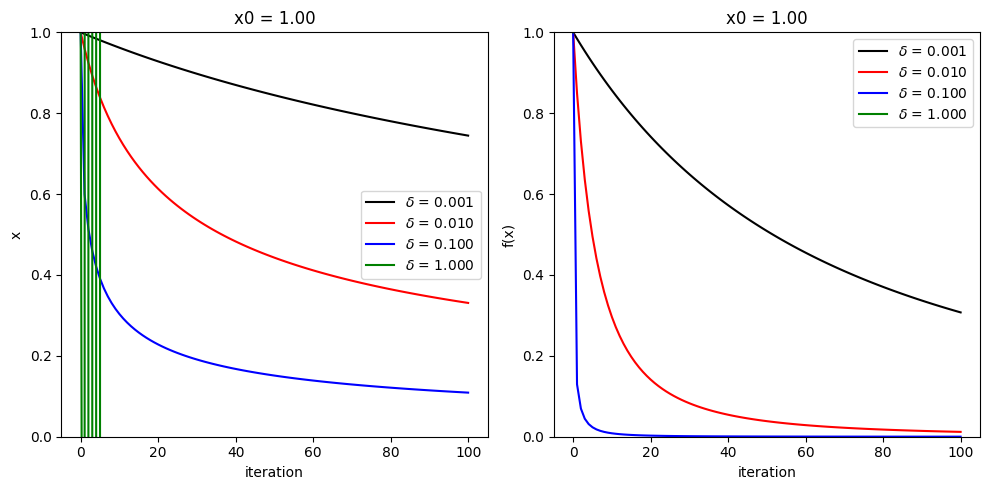

In [52]:
#  Now repeat (ii) for a range of initial values for x and step sizes α. Be sure to
# choose a large enough range of step sizes that you see a variety of behaviours
# (including non-convergence). How does the choice of x and α values affect the
# convergence time and accuracy? Why

# first lest range the intial values for x
x_range = np.linspace(0,1,4)
alpha_range = [0.001, 0.01, 0.1, 1]




#print (x_range)



for i in range(len(x_range)):
    (X, F) = gradDescent(fn,x0=x_range[i],alpha=alpha_range[0], num_iters=100)
    (X_1, F_1) = gradDescent(fn,x0=x_range[i],alpha=alpha_range[1], num_iters=100)
    (X_2, F_2) = gradDescent(fn,x0=x_range[i],alpha=alpha_range[2], num_iters=100)
    (X_3, F_3) = gradDescent(fn,x0=x_range[i],alpha=alpha_range[3], num_iters=100)
  
   
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(X,  color='black', label='$\delta$ = {:.3f}'.format(alpha_range[0]))
    plt.plot(X_1,  color='red', label='$\delta$ = {:.3f}'.format(alpha_range[1]))
    plt.plot(X_2,color='blue', label='$\delta$ = {:.3f}'.format(alpha_range[2]))
    plt.plot(X_3 , color='green', label='$\delta$ = {:.3f}'.format(alpha_range[3]))
    
    plt.xlabel('iteration')
    plt.ylabel('x')
    plt.title('x0 = {:.2f}'.format(x_range[i]))
    plt.ylim(0, 1)
    plt.legend()

   
    plt.subplot(1, 2, 2)
    plt.plot(F,  color='black', label='$\delta$ = {:.3f}'.format(alpha_range[0]))
    plt.plot(F_1,  color='red', label='$\delta$ = {:.3f}'.format(alpha_range[1]))
    plt.plot(F_2,color='blue', label='$\delta$ = {:.3f}'.format(alpha_range[2]))
    plt.plot(F_3, color='green', label='$\delta$ = {:.3f}'.format(alpha_range[3]))
    plt.xlabel('iteration')
    plt.title('x0 = {:.2f}'.format(x_range[i]))
    plt.ylabel('f(x)')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.legend()
    plt.show()



In [65]:
# (c) (i) Change to using the function y(x) = γx2 where γ is a parameter that you choose.
# Holding the step size α constant, how does changing γ affect the convergence of
# your gradient descent programme? Why?

class function():
    def __init__(self, gamma):
        self.gamma = gamma  

    def f(self, x):
        return self.gamma*x**2
    
    def df(self, x):
        return 2*self.gamma*x

<Figure size 640x480 with 0 Axes>

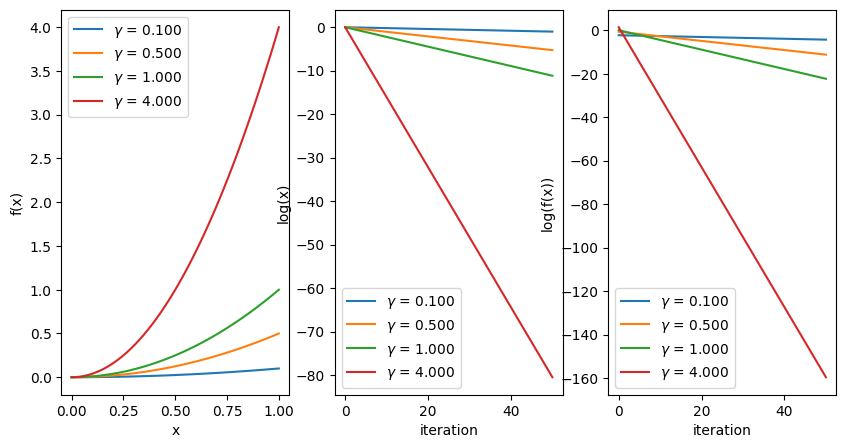

In [77]:
gamma_range = [ 0.1, 0.5,1,4]
x = np.linspace(0,1,50)

fig = plt.figure()
(X,F) = gradDescent(function(gamma_range[0]),x0=1,alpha=0.1, num_iters=50)
(X_1,F_1) = gradDescent(function(gamma_range[1]),x0=1,alpha=0.1, num_iters=50)
(X_2,F_2) = gradDescent(function(gamma_range[2]),x0=1,alpha=0.1, num_iters=50)
(X_3,F_3) = gradDescent(function(gamma_range[3]),x0=1,alpha=0.1, num_iters=50)

fig = plt.figure(figsize=(10, 5))
#plot the function
plt.subplot(1,3,1)
plt.plot(x, function(gamma_range[0]).f(x), label  = '$\gamma$ = {:.3f}'.format(gamma_range[0]))
plt.plot(x, function(gamma_range[1]).f(x), label  = '$\gamma$ = {:.3f}'.format(gamma_range[1]))
plt.plot(x, function(gamma_range[2]).f(x), label  = '$\gamma$ = {:.3f}'.format(gamma_range[2]))
plt.plot(x, function(gamma_range[3]).f(x), label  = '$\gamma$ = {:.3f}'.format(gamma_range[3]))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()




plt.subplot(1,3,2)
# plt.plot(F,  color='black', label='$\delta$ = {:.3f}'.format(alpha_range[0]))
plt.plot(np.log(X), label  = '$\gamma$ = {:.3f}'.format(gamma_range[0]))
plt.plot(np.log(X_1), label  = '$\gamma$ = {:.3f}'.format(gamma_range[1]))
plt.plot(np.log(X_2), label  = '$\gamma$ = {:.3f}'.format(gamma_range[2]))
plt.plot(np.log(X_3), label  = '$\gamma$ = {:.3f}'.format(gamma_range[3]))


plt.xlabel('iteration')
plt.ylabel('log(x)')
plt.legend()

plt.subplot(1,3,3)
plt.plot(np.log(F), label  = '$\gamma$ = {:.3f}'.format(gamma_range[0]))
plt.plot(np.log(F_1), label  = '$\gamma$ = {:.3f}'.format(gamma_range[1]))
plt.plot(np.log(F_2), label  = '$\gamma$ = {:.3f}'.format(gamma_range[2]))
plt.plot(np.log(F_3), label  = '$\gamma$ = {:.3f}'.format(gamma_range[3]))

plt.xlabel('iteration')
plt.ylabel('log(f(x))')


plt.legend()	
plt.show()



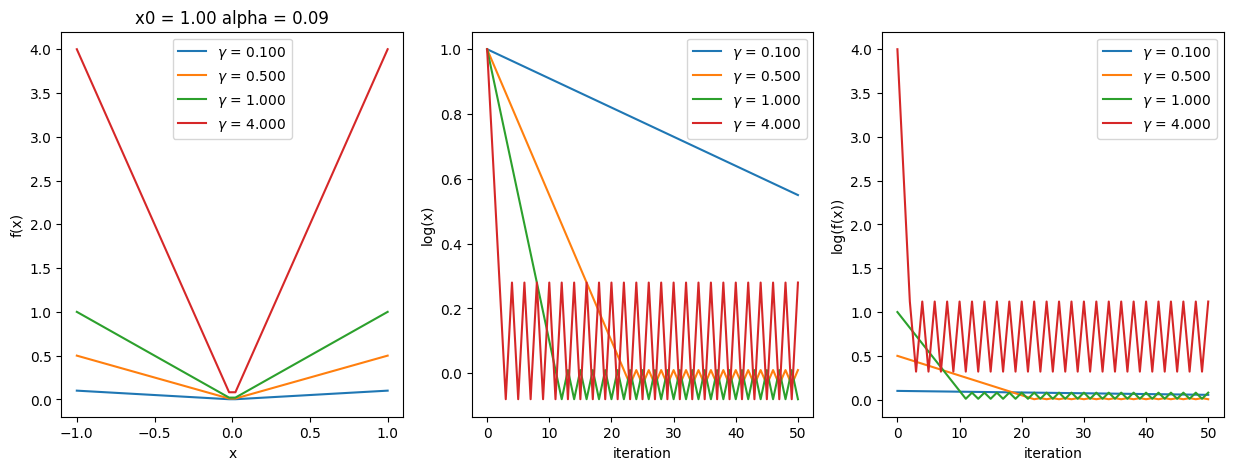

In [92]:
#(ii) Repeat for the function y(x) = γ|x|.

class function():
    def __init__(self, gamma):
        self.gamma = gamma  

    def f(self, x):
        return self.gamma*abs(x)
    
    def df(self, x):
        return self.gamma*np.sign(x)


gamma_range = [ 0.1, 0.5,1,4]
x = np.linspace(-1,1,50)
x0=1
alpha=0.09

(X,F) = gradDescent(function(gamma_range[0]),x0,alpha, num_iters=50)
(X_1,F_1) = gradDescent(function(gamma_range[1]),x0, alpha , num_iters=50)
(X_2,F_2) = gradDescent(function(gamma_range[2]),x0, alpha , num_iters=50)
(X_3,F_3) = gradDescent(function(gamma_range[3]),x0, alpha , num_iters=50)

fig = plt.figure(figsize=(15, 5))

#plot the function
plt.subplot(1,3,1)
plt.plot(x, function(gamma_range[0]).f(x), label  = '$\gamma$ = {:.3f}'.format(gamma_range[0]))
plt.plot(x, function(gamma_range[1]).f(x), label  = '$\gamma$ = {:.3f}'.format(gamma_range[1]))
plt.plot(x, function(gamma_range[2]).f(x), label  = '$\gamma$ = {:.3f}'.format(gamma_range[2]))
plt.plot(x, function(gamma_range[3]).f(x), label  = '$\gamma$ = {:.3f}'.format(gamma_range[3]))
plt.xlabel('x')
plt.title('x0 = {:.2f}'.format(x0) + ' alpha = {:.2f}'.format(alpha))
plt.ylabel('f(x)')
plt.legend()




plt.subplot(1,3,2)
# plt.plot(F,  color='black', label='$\delta$ = {:.3f}'.format(alpha_range[0]))
plt.plot(X, label  = '$\gamma$ = {:.3f}'.format(gamma_range[0]))
plt.plot(X_1, label  = '$\gamma$ = {:.3f}'.format(gamma_range[1]))
plt.plot(X_2, label  = '$\gamma$ = {:.3f}'.format(gamma_range[2]))
plt.plot(X_3, label  = '$\gamma$ = {:.3f}'.format(gamma_range[3]))


plt.xlabel('iteration')
plt.ylabel('x')
plt.legend()

plt.subplot(1,3,3)
plt.plot(F, label  = '$\gamma$ = {:.3f}'.format(gamma_range[0]))
plt.plot(F_1, label  = '$\gamma$ = {:.3f}'.format(gamma_range[1]))
plt.plot(F_2, label  = '$\gamma$ = {:.3f}'.format(gamma_range[2]))
plt.plot(F_3, label  = '$\gamma$ = {:.3f}'.format(gamma_range[3]))

plt.xlabel('iteration')
plt.ylabel('f(x)')


plt.legend()	
plt.show()